In [1]:
# основные библиотеки для работы с данными
import pandas as pd
import numpy as np

# инструменты визуализации
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('/Users/alex_eyfler/ds_bootcamp/rent_real_estate_team_pandas/Alexander/data/cleaned_data.csv')

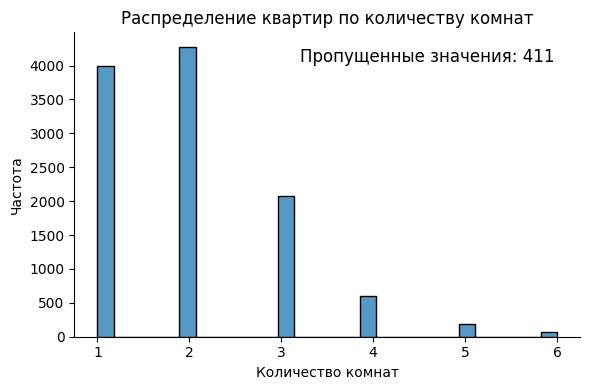

In [26]:
# Построим гистрограмму распределения квартир по количеству комнат.
# Дополнительно посчитаем и выведем количество пропущенных данных NaNов

nan_count = df['Количество комнат'].isna().sum()

sns.displot(
    data=df,
    x='Количество комнат',
    kind='hist',
    kde=False,
    height=4,
    aspect=1.5
)
plt.xlabel(xlabel='Количество комнат')
plt.ylabel(ylabel='Частота')
plt.title(label='Распределение квартир по количеству комнат')
plt.text(
    x=0.95, y=0.95, 
    s=f'Пропущенные значения: {nan_count}', 
    fontsize=12, 
    transform=plt.gca().transAxes, 
    ha='right', va='top'
)
plt.tight_layout();

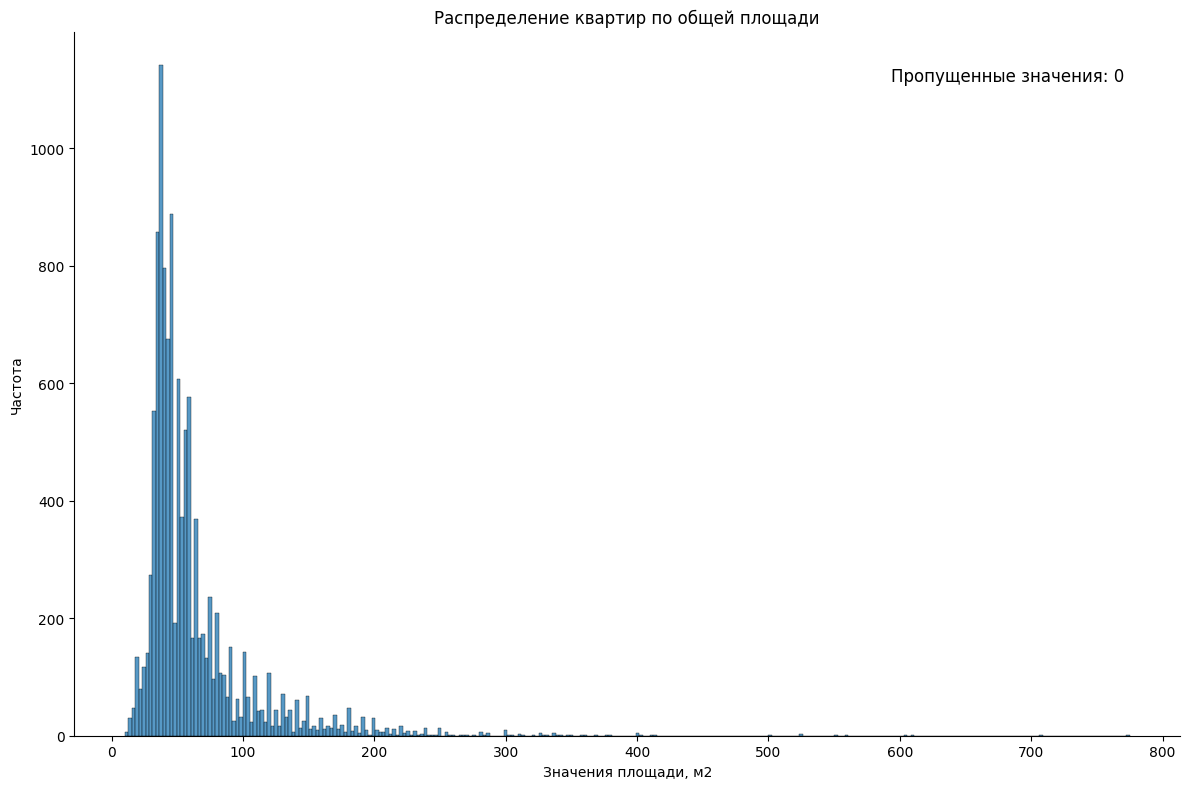

In [28]:
# Построим гистрограмму распределения квартир по площади.
# Дополнительно посчитаем и выведем количество пропущенных данных NaNов

nan_count = df['Общая площадь, м2'].isna().sum()

sns.displot(
    data=df,
    x='Общая площадь, м2',
    kind='hist',
    kde=False,
    height=8,
    aspect=1.5
)
plt.xlabel(xlabel='Значения площади, м2')
plt.ylabel(ylabel='Частота')
plt.title(label='Распределение квартир по общей площади')
plt.text(
    x=0.95, y=0.95, 
    s=f'Пропущенные значения: {nan_count}', 
    fontsize=12, 
    transform=plt.gca().transAxes, 
    ha='right', va='top'
)
plt.tight_layout();

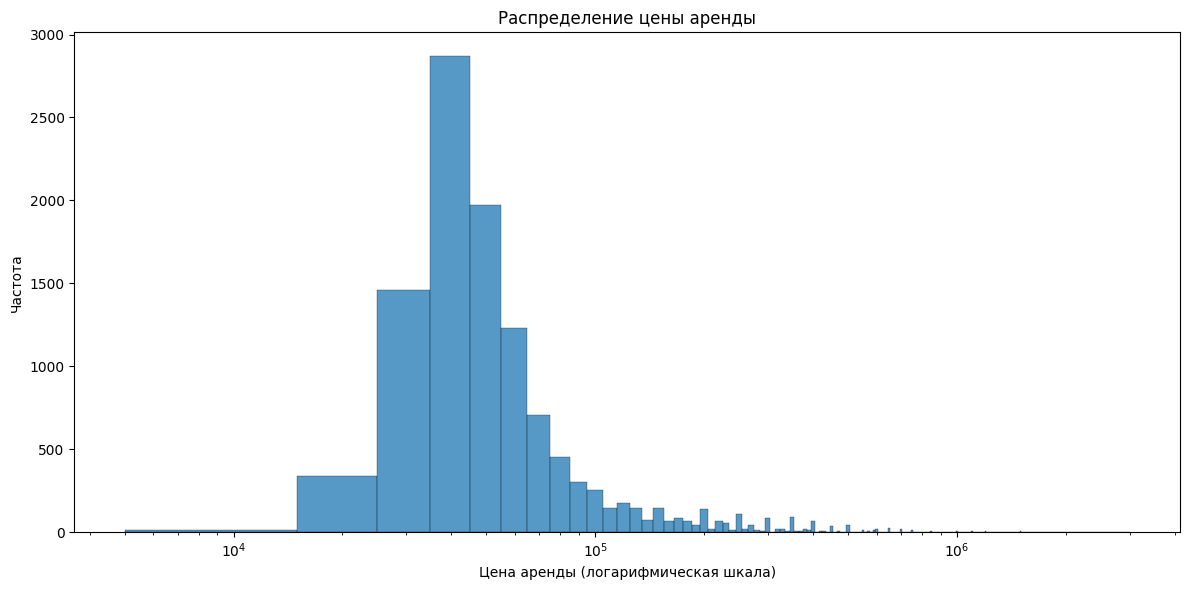

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(
    data=df,
    x='Цена аренды',
    bins=300
)
ax.set(
    title='Распределение цены аренды',
    xlabel='Цена аренды (логарифмическая шкала)',
    ylabel='Частота'
)
plt.xscale('log')
plt.tight_layout();

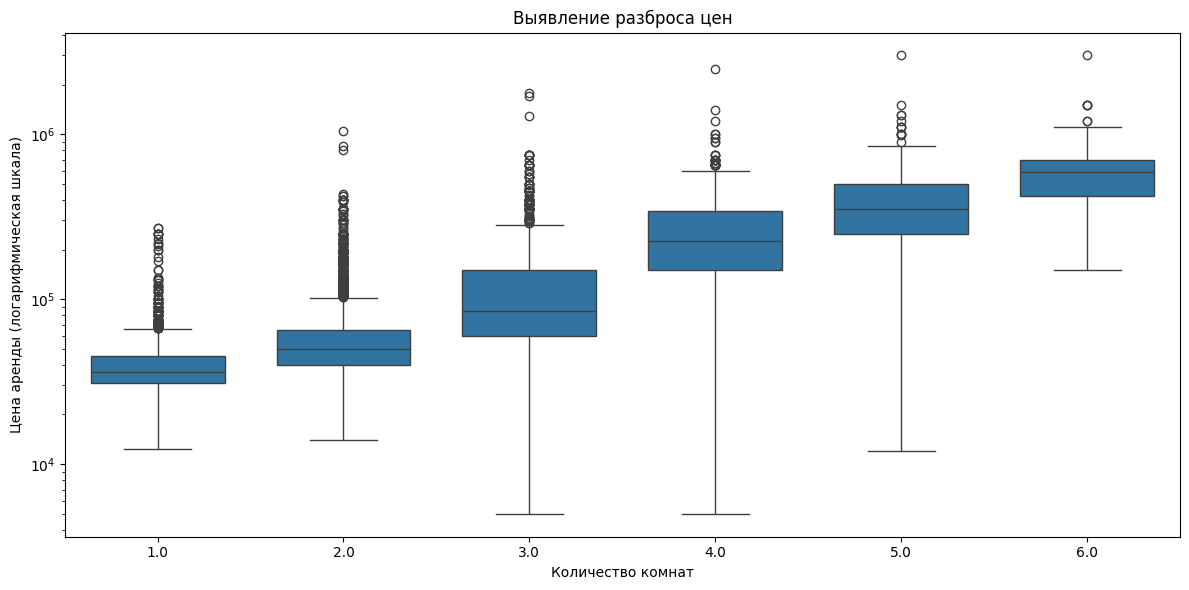

In [57]:
# boxplot для выявления разброса цен, выявления медианы, квартилей и возможных
# выбросов

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(
    data=df,
    x='Количество комнат',
    y='Цена аренды',
    gap=0.1
)
# логарифмическая шкала для корректного отображения боксплота
plt.yscale('log')

ax.set(
    title='Выявление разброса цен',
    xlabel='Количество комнат',
    ylabel='Цена аренды (логарифмическая шкала)'
)

plt.tight_layout();

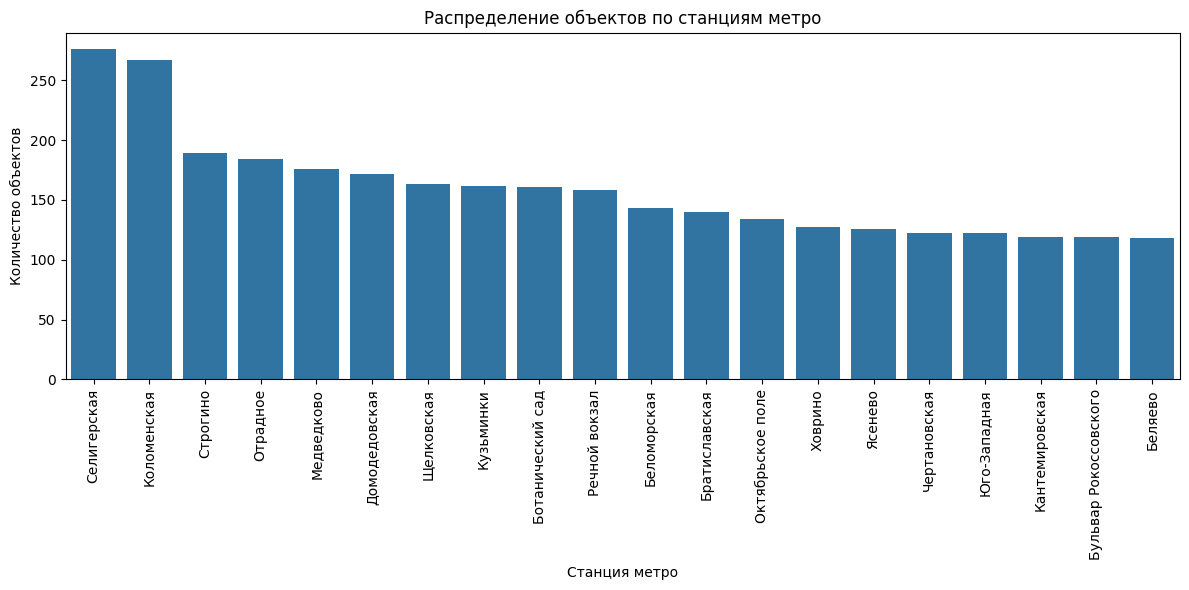

In [60]:
# столбчатая диаграмма отображения частоты объектов у разных станций метро
# получилась нечитабельная диаграмма, возьмем топ 20 станций метро

top_20_stations = df['Метро'].value_counts().nlargest(20).index
df_top_20 = df[df['Метро'].isin(top_20_stations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_20, x='Метро', order=top_20_stations)

plt.xlabel('Станция метро')
plt.ylabel('Количество объектов')
plt.title('Распределение объектов по станциям метро')
plt.xticks(rotation=90)
plt.tight_layout();

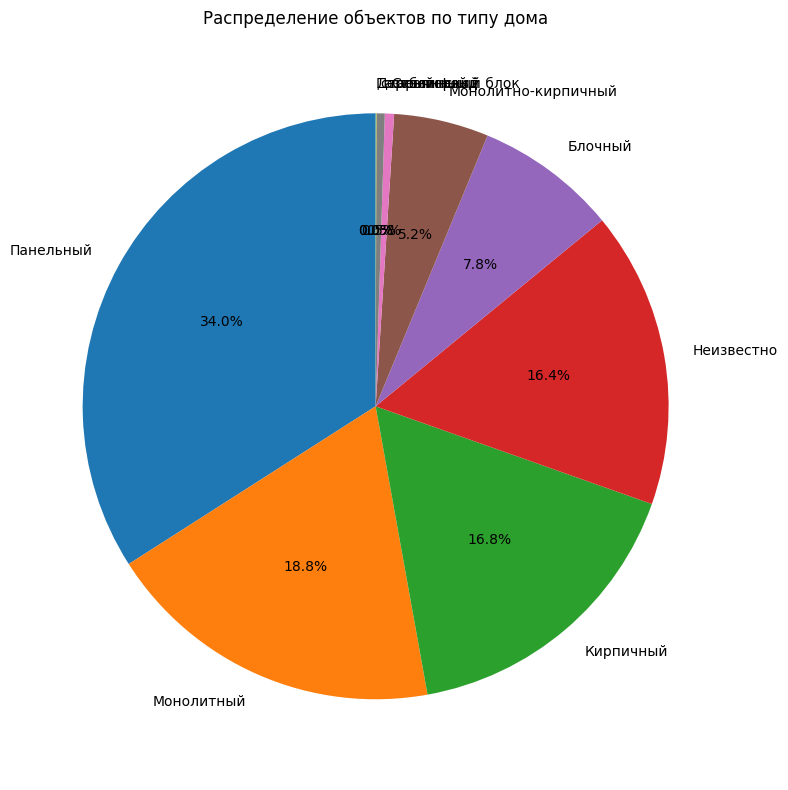

In [67]:
# круговая диаграмма по типу дома

# Подсчет количества объектов по типу дома
house_type_counts = df['Тип дома'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    house_type_counts,
    labels=house_type_counts.index,
    autopct='%1.1f%%',
    startangle=90
    )

# Настройки диаграммы
plt.title('Распределение объектов по типу дома')
plt.axis('equal')  # Чтобы круг был кругом, а не овалом
plt.tight_layout();

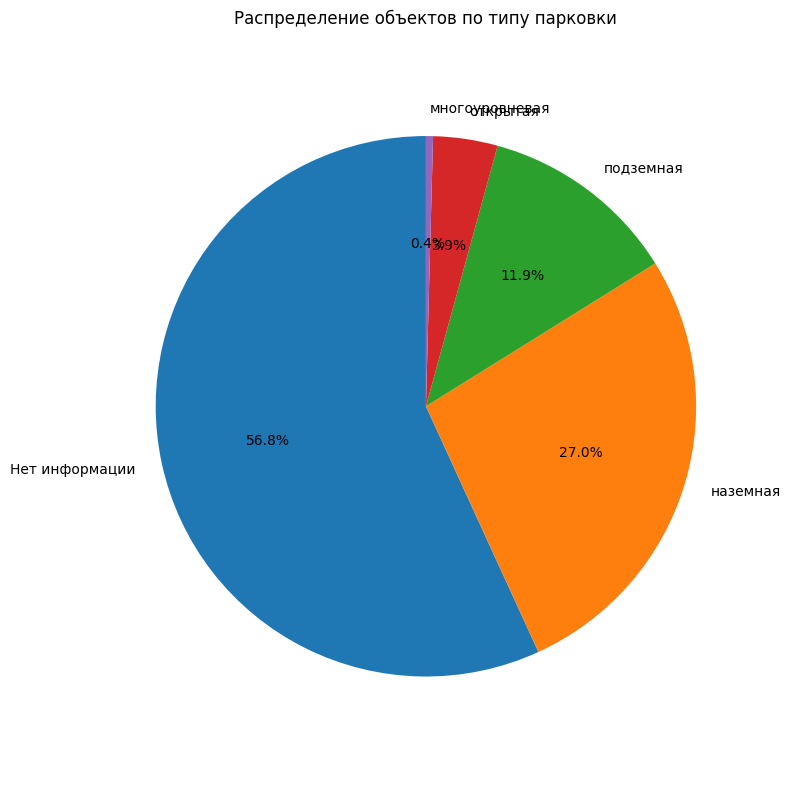

In [68]:
# круговая диаграмма по типу парковки
df_copy = df.copy()
df_copy['Парковка'] = df_copy['Парковка'].fillna('Нет информации')

# Подсчет количества объектов по типу парковки
parking_counts = df_copy['Парковка'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    parking_counts,
    labels=parking_counts.index,
    autopct='%1.1f%%',
    startangle=90
    )
plt.title('Распределение объектов по типу парковки')
plt.axis('equal')  # Чтобы круг был кругом, а не овалом
plt.tight_layout();